### Demo with ML Pipelines

In [1]:
import ads
import oci
import os

from ads.jobs import DataScienceJob
from ads.pipeline import (Pipeline, PipelineStep, PipelineRun, ScriptRuntime,
                         NotebookRuntime, CustomScriptStep)
from tempfile import mkdtemp

%load_ext ads.pipeline.extension

In [2]:
print(f"ADS version is: {ads.__version__}")

ADS version is: 2.8.8


In [3]:
# general settings

ads.set_auth('resource_principal')
             
compartment_id = os.environ['NB_SESSION_COMPARTMENT_OCID']
project_id = os.environ["PROJECT_OCID"]

# Logs 
# The log group OCID
log_group_id="ocid1.loggroup.oc1.eu-frankfurt-1.amaaaaaangencdyazs4l4rzrzsarlej6mqlwlbz6bmnx4adwdlssveam2jaa"

# The log OCID
log_id="ocid1.log.oc1.eu-frankfurt-1.amaaaaaangencdya47httqmxyiew5tkxa6l7gekev2ljpasixuhmp2fa3v5q"

# define the env to execute the pipeline STEPS
CONDA_ENV_SLUG = "generalml_p38_cpu_v1"

### Prepare a simple script to be run with in a Pipeline step (on the local fs !)

In [4]:
# for flex shape_config_details={"ocpus": 2, "memory_in_gbs": 32},

# 1. Infrastructure
infrastructure = CustomScriptStep(
    block_storage_size=200,
    shape_name="VM.Standard2.1",  
)

# 2. Runtime (scripts)
script1_runtime = ScriptRuntime(
    script_path_uri="./pipeline_step1_script.py",
    conda={"type": "service", "slug": CONDA_ENV_SLUG}
)

script2_runtime = ScriptRuntime(
    script_path_uri="./pipeline_step2_script.py",
    conda={"type": "service", "slug": CONDA_ENV_SLUG}
)

# remeber to pass the raw!!
notebook_runtime = NotebookRuntime(
    notebook_path_uri="https://raw.githubusercontent.com/luigisaetta/ml-pipelines/main/nb_test1.ipynb",
    conda={"type": "service", "slug": CONDA_ENV_SLUG}
)

# Steps definitions
pipeline_step_1 = PipelineStep(
    name="step_1",
    description="Step1: running a Python script",
    infrastructure=infrastructure,
    runtime=script1_runtime
)

pipeline_step_2 = PipelineStep(
    name="step_2",
    description="Step2: running a Python script",
    infrastructure=infrastructure,
    runtime=script2_runtime
)

pipeline_step_3 = PipelineStep(
    name="step_3",
    description="Step3: running a notebook",
    infrastructure=infrastructure,
    runtime=notebook_runtime
)

#
# Here we define the pipeline
#
pipeline = Pipeline(
    name="MLPipe Test001",
    compartment_id=compartment_id,
    project_id=project_id,
    step_details=[pipeline_step_1, pipeline_step_2, pipeline_step_3],
    dag=["(step_1, step_2) >> step_3"],
    log_group_id=log_group_id,
    log_id=log_id,
    enable_service_log=False
  )

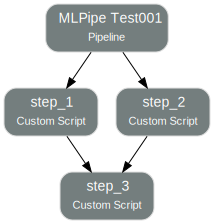

In [5]:
pipeline.show()

In [6]:
pipeline.create()


kind: pipeline
spec:
  blockStorageSizeInGBs: 2000
  compartmentId: ocid1.compartment.oc1..aaaaaaaag2cpni5qj6li5ny6ehuahhepbpveopobooayqfeudqygdtfe6h3a
  dag:
  - (step_1, step_2) >> step_3
  displayName: MLPipe Test001
  enableServiceLog: false
  id: ocid1.datasciencepipeline.oc1.eu-frankfurt-1.amaaaaaangencdyav5rqnjn2uktlb24xvi3j7iab5dmpb3npjagbkhjudtia
  logGroupId: ocid1.loggroup.oc1.eu-frankfurt-1.amaaaaaangencdyazs4l4rzrzsarlej6mqlwlbz6bmnx4adwdlssveam2jaa
  logId: ocid1.log.oc1.eu-frankfurt-1.amaaaaaangencdya47httqmxyiew5tkxa6l7gekev2ljpasixuhmp2fa3v5q
  projectId: ocid1.datascienceproject.oc1.eu-frankfurt-1.amaaaaaangencdyasybymsgwfmwo7ukyjs6kdl573kpxnb5rgy52c5irb5pq
  shapeName: VM.GPU.A10.2
  stepDetails:
  - kind: customScript
    spec:
      description: 'Step1: running a Python script'
      infrastructure:
        kind: infrastructure
        spec:
          blockStorageSize: 200
          shapeName: VM.Standard2.1
      name: step_1
      runtime:
        kind: runtime


In [7]:
pipeline_run = pipeline.run(display_name="ML pipe run001")

In [8]:
pipeline_run.watch()

Pipeline OCID: ocid1.datasciencepipeline.oc1.eu-frankfurt-1.amaaaaaangencdyav5rqnjn2uktlb24xvi3j7iab5dmpb3npjagbkhjudtia
Pipeline Run OCID: ocid1.datasciencepipelinerun.oc1.eu-frankfurt-1.amaaaaaangencdyaw642s3gpycccl6eswlpjwxp54uvm32t6evisqukx74vq
[C] - custom log
[C] - 2023-09-11 08:27:09 - Hello Luigi...
[C] - 2023-09-11 08:27:09 - 
[C] - 2023-09-11 08:27:09 - Step1 script:
[C] - 2023-09-11 08:27:51 - Hello Luigi again (step2)...
[C] - 2023-09-11 08:27:51 - 
[C] - 2023-09-11 08:27:51 - Step2 script:
[C] - 2023-09-11 08:33:05 - 
[C] - 2023-09-11 08:33:05 - 
[C] - 2023-09-11 08:33:05 - Hello from Notebook: ciao Luigi !!!


compartmentId: ocid1.compartment.oc1..aaaaaaaag2cpni5qj6li5ny6ehuahhepbpveopobooayqfeudqygdtfe6h3a
configurationDetails:
  environmentVariables: {}
  type: DEFAULT
createdBy: ocid1.datasciencenotebooksession.oc1.eu-frankfurt-1.amaaaaaangencdyalfsguk5p6aymrnu7lagytnwmetxly2a3e3aykqkqlhgq
definedTags:
  default-tags:
    CreatedBy: ocid1.datasciencenotebooksession.oc1.eu-frankfurt-1.amaaaaaangencdyalfsguk5p6aymrnu7lagytnwmetxly2a3e3aykqkqlhgq
displayName: ML pipe run001
id: ocid1.datasciencepipelinerun.oc1.eu-frankfurt-1.amaaaaaangencdyaw642s3gpycccl6eswlpjwxp54uvm32t6evisqukx74vq
lifecycleDetails: Pipeline run is in progress. Please check the step runs for more
  details.
lifecycleState: SUCCEEDED
logDetails:
  logGroupId: ocid1.loggroup.oc1.eu-frankfurt-1.amaaaaaangencdyazs4l4rzrzsarlej6mqlwlbz6bmnx4adwdlssveam2jaa
  logId: ocid1.log.oc1.eu-frankfurt-1.amaaaaaangencdya47httqmxyiew5tkxa6l7gekev2ljpasixuhmp2fa3v5q
pipelineId: ocid1.datasciencepipeline.oc1.eu-frankfurt-1.amaaaaaangencdyav

In [ ]:
pipeline_run.show(mode="text", wait=True)

#### Magic Commands

In [9]:
PIPELINE_RUN_ID = "ocid1.datasciencepipelinerun.oc1.eu-frankfurt-1.amaaaaaangencdyaivxooqrmjlrxaghctoxmtugxo4oczp6rjqw37f2ke2wq"

%pipeline log $PIPELINE_RUN_ID -l custom_log

Pipeline OCID: ocid1.datasciencepipeline.oc1.eu-frankfurt-1.amaaaaaangencdyah5urfqbxqvesdf77qrxp7i7ygbkpu6tr5gmct3pkt5oq
Pipeline Run OCID: ocid1.datasciencepipelinerun.oc1.eu-frankfurt-1.amaaaaaangencdyaivxooqrmjlrxaghctoxmtugxo4oczp6rjqw37f2ke2wq
[C] - custom log
[C] - 2023-09-09 10:59:27 - Hello Luigi...
[C] - 2023-09-09 10:59:27 - 
[C] - 2023-09-09 10:59:27 - Step1 script:
[C] - 2023-09-09 10:59:51 - Step2 script:
[C] - 2023-09-09 10:59:51 - Hello Luigi again (step2)...
[C] - 2023-09-09 10:59:51 - 
[C] - 2023-09-09 11:05:18 - 
[C] - 2023-09-09 11:05:18 - Hello from Notebook: ciao Luigi !!!
[C] - 2023-09-09 11:05:18 - 


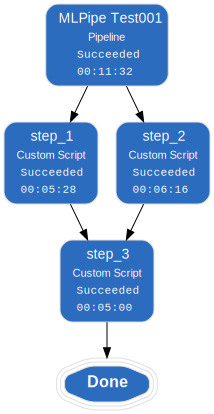

In [10]:
%pipeline status $PIPELINE_RUN_ID -w